In [1]:
## Naive Bayes Practice

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
sc_X = StandardScaler()
get_ipython().magic('matplotlib inline')


In [3]:
data=pd.read_csv('diabetes_data.csv')


data.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

data.head()

data.shape

data.columns

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    500
1    267
Name: Outcome, dtype: int64
% of 1= 0.34810951760104303
% of 0= 0.651890482398957


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


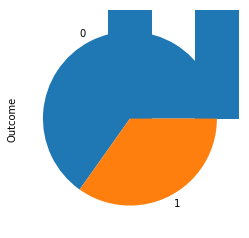

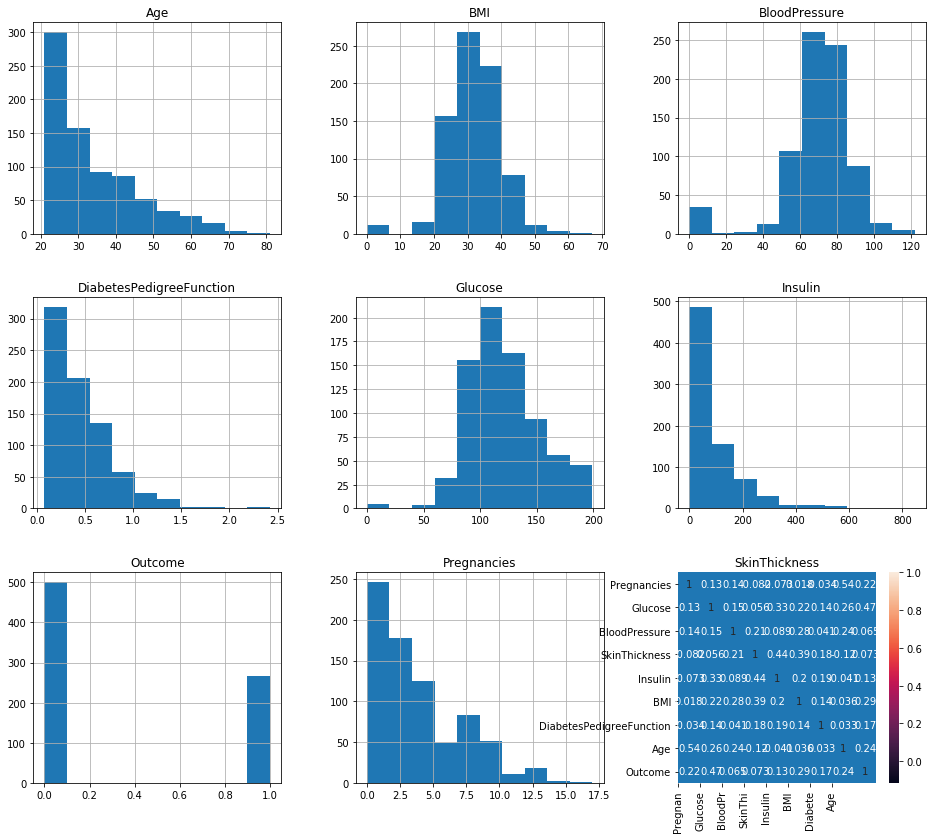

In [4]:
print(data['Outcome'].value_counts())
data['Outcome'].value_counts().plot.bar()

data['Outcome'].value_counts().plot.pie()


y0=len(data[data['Outcome']==0])
y1=len(data[data['Outcome']==1])
y01=len(data)
print("% of 1=",(y1/y01))
print("% of 0=",(y0/y01))

data.hist(figsize=(16,14))

#Data Cleaning
data.isnull().sum()

#split in dependent and independent
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]


sns.heatmap(data.corr(), annot = True)

D={}
for i in list(X.columns):
    D[i]=len((X[X[i]==0]))
D


plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)),[i[0:7] for i in D.keys()] )


#Replacing null values with mean values

zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    X[column] = X[column].replace(0, np.NaN)
    mean = int(X[column].mean(skipna=True))
    X[column] = X[column].replace(np.NaN, mean)


d={}
for i in list(X.columns):
    d[i]=len((X[X[i]==0]))
d


#split data in to test and trainee

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

# Normalization of data

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [5]:
# Applying Naive Bayes

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classifier.predict(X_test)[0:15])

print(classifier.predict_proba(X_test)[0:15])

cm = confusion_matrix(y_test, y_pred)
print ('confusion_matrix\n',cm)
print('\nf1_score=',f1_score(y_test, y_pred))
print('accuracy_score=',accuracy_score(y_test, y_pred))


TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificy  : %.4f" % (TN / float(TN + FP)))


#predicted probabilities
save_predictions_proba = classifier.predict_proba(X_test)[:, 1]  # column 1

[1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]
[[0.01159559 0.98840441]
 [0.71486445 0.28513555]
 [0.33920017 0.66079983]
 [0.8940374  0.1059626 ]
 [0.97499321 0.02500679]
 [0.85492089 0.14507911]
 [0.03518682 0.96481318]
 [0.99119448 0.00880552]
 [0.93226521 0.06773479]
 [0.9562204  0.0437796 ]
 [0.9985674  0.0014326 ]
 [0.90057272 0.09942728]
 [0.98255991 0.01744009]
 [0.42557359 0.57442641]
 [0.98303981 0.01696019]]
confusion_matrix
 [[86 15]
 [21 32]]

f1_score= 0.64
accuracy_score= 0.7662337662337663
Sensitivity: 0.6038
Specificy  : 0.8515


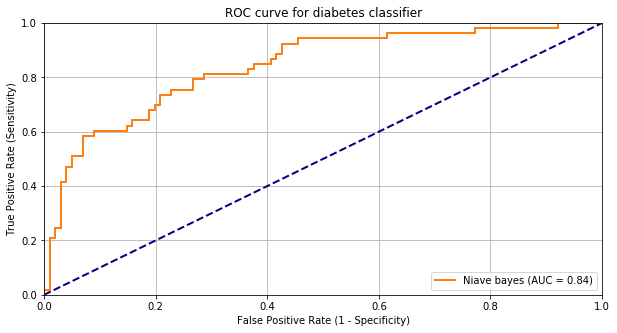

In [6]:
from sklearn.metrics import roc_curve, auc

FPR, TPR, thresholds = roc_curve(y_test, save_predictions_proba)

plt.figure(figsize=(10,5))  # figsize in inches
plt.plot(FPR, TPR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 50%  
plt.plot(FPR, TPR, lw=2, label='Niave bayes (AUC = %0.2f)' % auc(FPR, TPR))
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")